In [1]:
from pathlib import Path 
import pandas as pd 
import tarfile 
import urllib.request
import os 
import matplotlib.pyplot as plt 
import numpy as np 



In [2]:
def load_housing_data():
    tarball_path = Path("datasets/housing.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents = True  , exist_ok = True )
        url  = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url,tarball_path)
        with tarfile.open(tarball_path , 'r') as housing_tarball:
            housing_tarball.extractall(path = "datasets")
    return pd.read_csv(Path("datasets/housing/housing.csv"))
        

In [3]:
housing = load_housing_data()

In [4]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
housing['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [7]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [8]:
#to save the figure 
IMAGES_PATH = Path() / "images" / "end_to_end_project"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

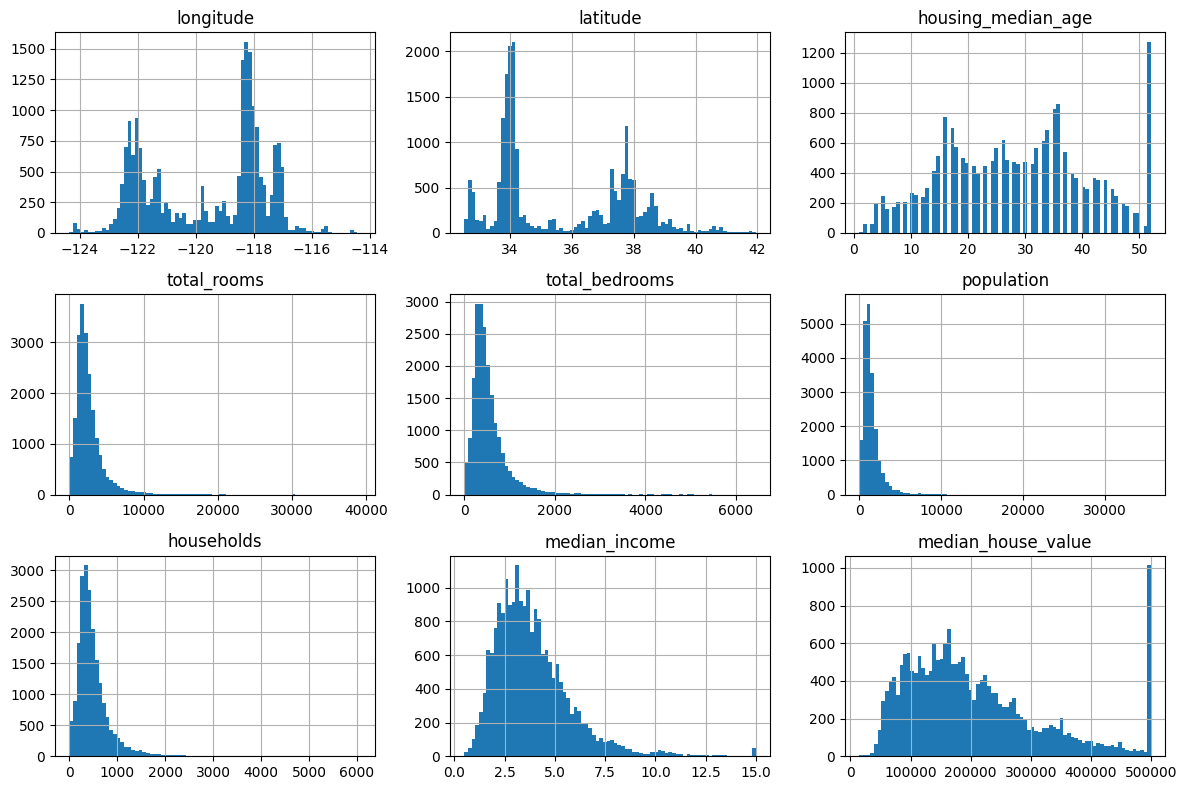

In [9]:
housing.hist(bins = 80 , figsize = (12 , 8))
save_fig("attribute_histogram_plots")
plt.show()





## Creating  A Test Set

In [10]:
def shuffle_and_split_data(data , test_ratio):
    shuffle_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffle_indices[:test_set_size]
    train_indices = shuffle_indices[test_set_size:]
    return data.iloc[train_indices] , data.iloc[test_indices]

In [11]:
# now we can use this function 
train_set , test_set =  shuffle_and_split_data(housing , 0.2)

In [12]:
from zlib import crc32 

def is_id_in_test_set(identifier , test_ratio):
    return crc32(np.int64(identifier)) < test_ratio * 2**32

def split_data_with_id_hash(data , test_ratio  , id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_:is_id_in_test_set(id_ , test_ratio))
    return data.loc[~in_test_set] , data.loc[in_test_set]
    

In [13]:
housing_with_id  = housing.reset_index() #adds an index columns
train_set  , test_set = split_data_with_id_hash(housing_with_id ,0.2 , "index")

In [14]:
from sklearn.model_selection import train_test_split 
train_set , test_set  = train_test_split(housing , test_size = 0.2 , random_state= 42 )

In [15]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

### checking skewneess

In [16]:
housing.median_income.skew()

1.6466567021344465

In [17]:
housing['income_cat'] = pd.cut(housing['median_income'] , bins = [-0.01 , 1.5 , 3.0 , 4.5 , 6. , np.inf] ,  labels = [1 , 2, 3 ,4 ,5 ])

In [18]:
bins = [0. , 1.5 , 3.0 , 4.5 , 6. , np.inf]
x = pd.cut(housing["median_income"] , bins = bins , labels = [1,2,3,4,5,]  )

<Axes: >

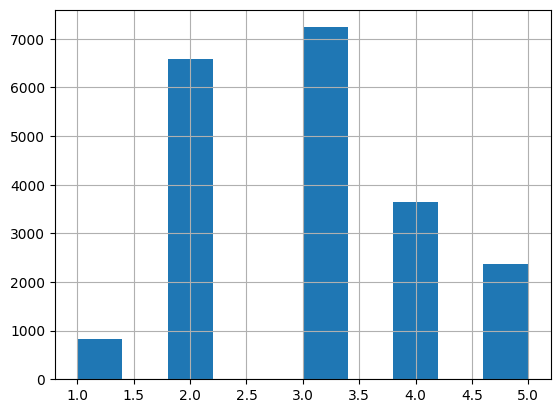

In [19]:
x.hist()

<Axes: xlabel='median_income'>

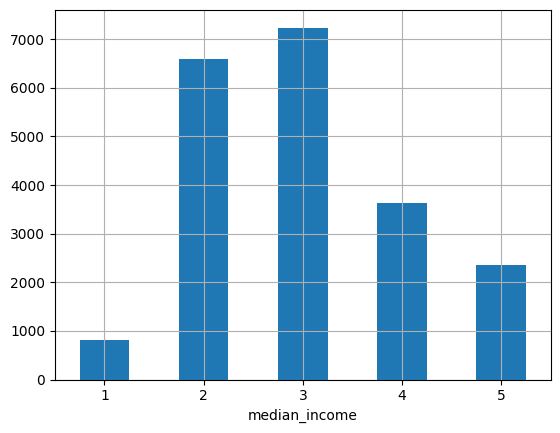

In [20]:
x.value_counts().sort_index().plot.bar(rot = 0 , grid = True  )

In [21]:
housing['income_cat']

0        5
1        5
2        5
3        4
4        3
        ..
20635    2
20636    2
20637    2
20638    2
20639    2
Name: income_cat, Length: 20640, dtype: category
Categories (5, int64): [1 < 2 < 3 < 4 < 5]

## Strattified split  
(way of pratition of the dataset into subset while ensuring that each subset maintians the same distrubution of some important characterstic poresent in the original data  )

In [22]:
#import 
from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits = 10 , test_size = 0.2 , random_state = 42)
strat_splits = [] 



In [23]:
train_list = []
test_list= []
for train  ,test     in  splitter.split(housing , housing['income_cat']):
    train_list.append(housing.iloc[train])
    test_list.append(housing.iloc[test])
    strat_splits.append([train_list , test_list])
    



In [24]:
housing.shape[0]

20640

In [25]:
#check 
np.asanyarray(train_list).shape[1:]  == (housing.shape[0]*0.8 , housing.shape[1])

True

### alternative

In [26]:
strat_train_set , start_test_set = train_test_split(housing , test_size = 0.2 , stratify= housing['income_cat'] , random_state = 42)

In [27]:
# seeing income category 
start_test_set['income_cat'].value_counts()/len(start_test_set)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

### we arenot going to use income_categrory colum column again thus drop  this one 

In [28]:
for set_ in (strat_train_set , start_test_set):
    set_.drop('income_cat'  , axis =1 , inplace = True )

In [29]:
for i in strat_train_set.columns:
    if i == 'income_cat':
        print(found)
    else :
        print("not found") 

not found
not found
not found
not found
not found
not found
not found
not found
not found
not found


## 
Explorization and visualize the data to gains inslights

2  important thigns before this 

1) if tranning datasets is huge make you may want to sample an exploration 
2) you should make a copy of origin so you can revert to it aftwerwards 

In [30]:
housing = strat_train_set.copy()

In [31]:
#making copy 
housing = strat_train_set


Visulizing Geographical  Data 


since datasets include geographical information (latitude and longitude )
so lets draw scatter point

In [32]:
import seaborn  as sns 

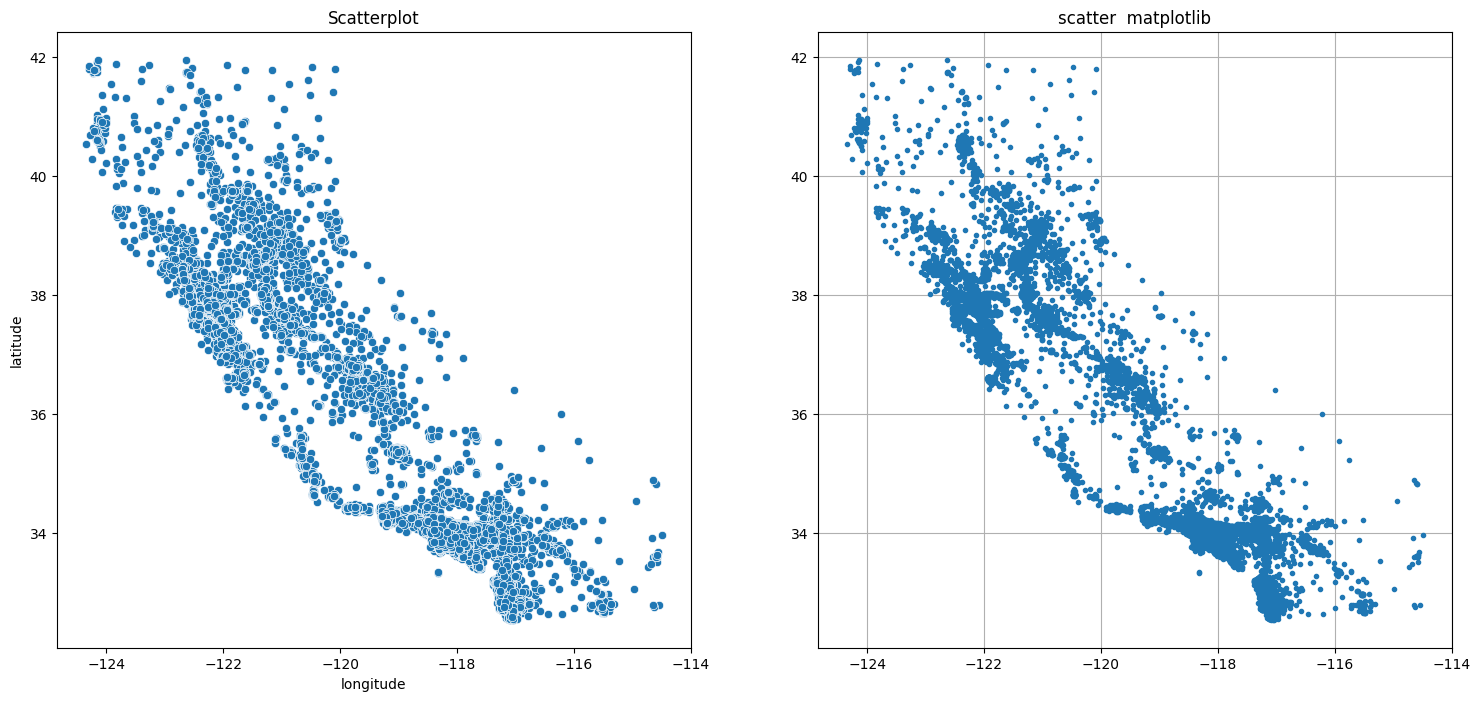

In [33]:
fig , (ax1, ax2) = plt.subplots(1, 2 , figsize = (18 , 8))
sns.scatterplot(x='longitude', y='latitude', data=housing, ax=ax1)
ax1.set_title('Scatterplot')
ax2.plot(housing['longitude'], housing['latitude'] , 'o' , markersize = 3  )
ax2.grid(True)
ax2.set_title('scatter  matplotlib')
plt.show()

APha = 0.2 

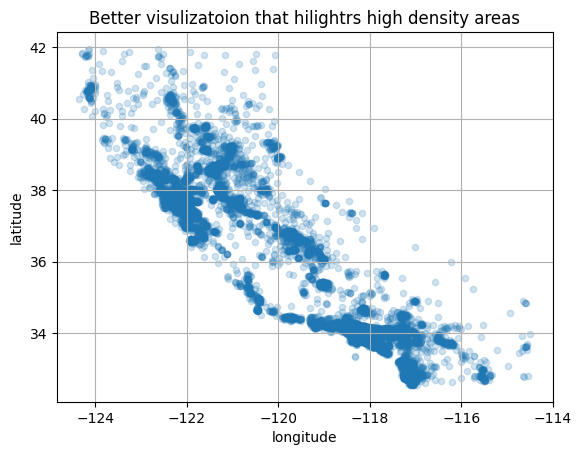

In [34]:
housing.plot(kind = 'scatter'  , x = 'longitude' , y = 'latitude' , grid = True , alpha = 0.2 )
plt.title('Better visulizatoion that hilightrs high density areas')
plt.show()


## Color map 
- c map

<Axes: xlabel='longitude', ylabel='latitude'>

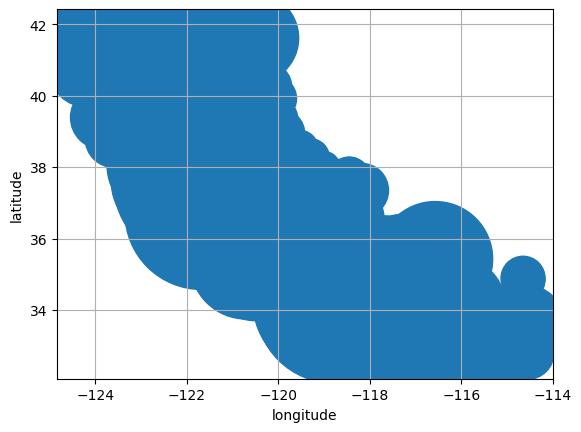

In [35]:
housing.plot(kind = 'scatter' , x = 'longitude' , y = 'latitude' , grid = 'True'  , s = housing['population'])

#normalizing

<Axes: xlabel='longitude', ylabel='latitude'>

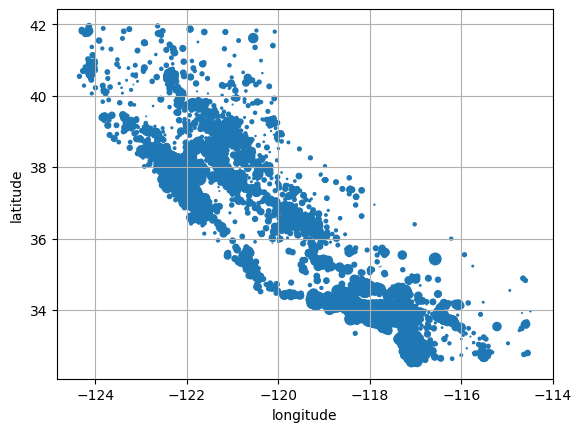

In [36]:
housing.plot(kind = 'scatter' , x = 'longitude' , y = 'latitude' , grid = 'True'  , s = housing['population']/100)

### c = 'medium_house_value

<Axes: xlabel='longitude', ylabel='latitude'>

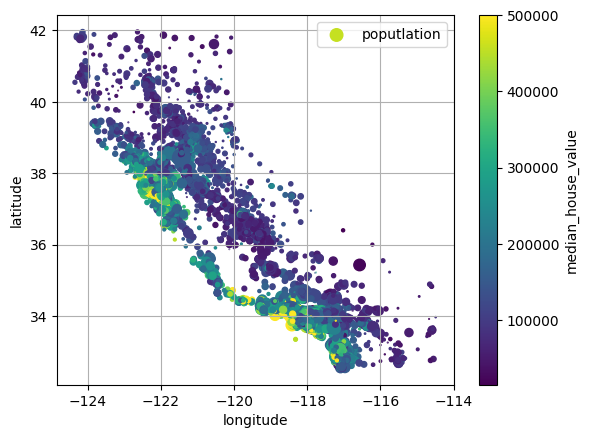

In [37]:
housing.plot(kind = 'scatter' , x = 'longitude' , y = 'latitude' , grid = 'True'  , s = housing['population']/100 , label = 'poputlation' , c = 'median_house_value')

## cmap 
- jet is a predifined coloar map ..which value range from blue (low ) to red (high)

<Axes: xlabel='longitude', ylabel='latitude'>

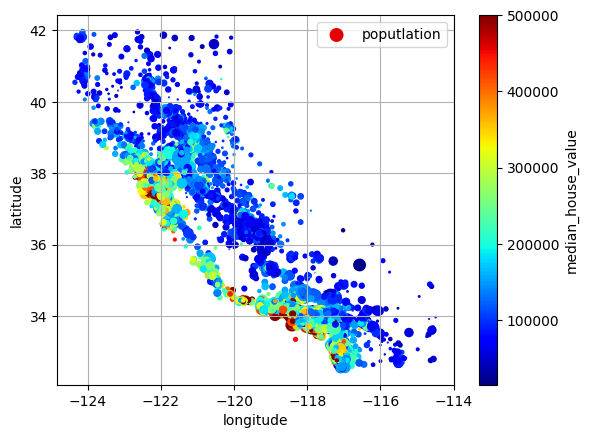

In [38]:
housing.plot(kind = 'scatter' , x = 'longitude' , y = 'latitude' , grid = 'True'  , s = housing['population']/100 , label = 'poputlation' , c = 'median_house_value' , cmap = 'jet')

## making figsize 10 , 17 

<Axes: xlabel='longitude', ylabel='latitude'>

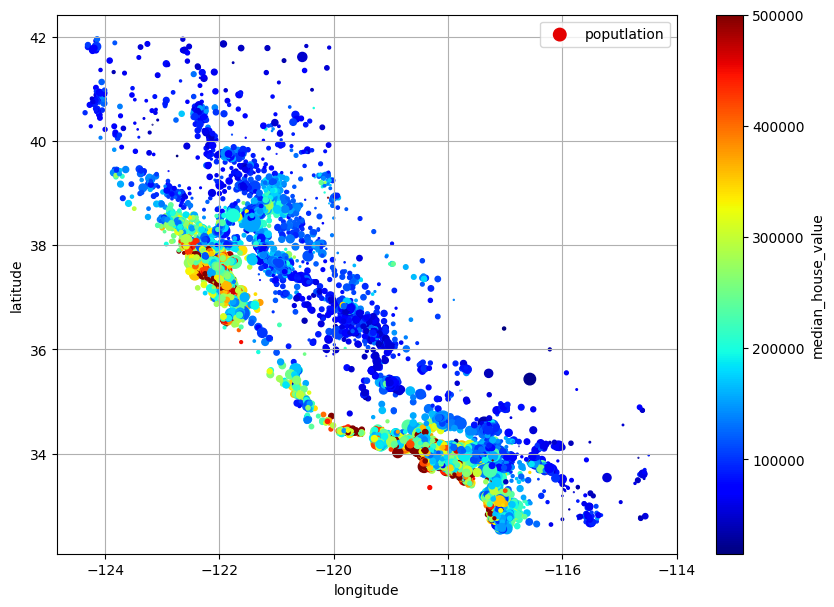

In [39]:
housing.plot(kind = 'scatter' , x = 'longitude' , y = 'latitude' , grid = 'True'  , s = housing['population']/100 , label = 'poputlation' , c = 'median_house_value' , cmap = 'jet' , legend = 'True' , sharex = False , figsize = (10 , 7))

## Looking for Core-lation 

In [42]:
#calculating standard coreltion cofficient (perarson;s r )
corr_matrix 

NameError: name 'corr_matrix' is not defined